
Missing values in each column:
msd_risk                    0
Cervical Deviation          0
Thoracic Deviation          0
Lumbar Deviation            0
Pelvic Tilt Deviation       0
Craniovertebral Angle       0
Shoulder Level Deviation    0
Backpack Height             0
Backpack Weight             0
Child’s Age                 0
Child’s Weight              0
Child’s Height              0
Gender                      0
dtype: int64

Statistical summary of the dataset:
           msd_risk  Cervical Deviation  Thoracic Deviation  Lumbar Deviation  \
count  10000.000000        10000.000000        10000.000000      10000.000000   
mean       1.016800            5.333774            7.329988          7.534957   
std        0.770699            3.855522            5.278391          4.817546   
min        0.000000            1.868204            3.316403          4.127822   
25%        0.000000            1.868204            3.316403          4.127822   
50%        1.000000            6.664560   

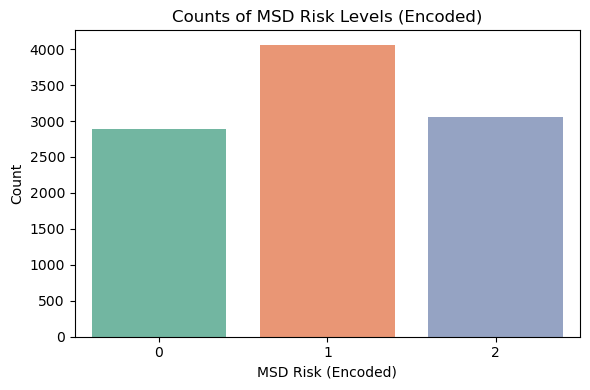

ValueError: could not convert string to float: 'Slightly Lower'

<Figure size 1000x800 with 0 Axes>

In [10]:
# msd_prediction.py

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Scikit-learn modules for pre-processing, modeling, and evaluation
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

import warnings
warnings.filterwarnings('ignore')

# -------------------------------
# 1. Data Generation / Loading
# -------------------------------

# Option A: Load your own dataset (uncomment and adjust the file path)
df = pd.read_excel('msd_risk_dataset.xlsx')

# --------------------------------
# 2. Data Pre-processing
# --------------------------------

# Check for missing values
print("\nMissing values in each column:")
print(df.isnull().sum())

# (If needed, handle missing values here. For simplicity, we drop missing values.)
df.dropna(inplace=True)

# Encode categorical variables.
# For 'gender' convert to binary (e.g., M=1, F=0)
le_gender = LabelEncoder()
df['Gender'] = le_gender.fit_transform(df['Gender'])

# Encode target variable 'MSD_risk' (low, medium, high) into numeric values.
le_target = LabelEncoder()
df['msd_risk'] = le_target.fit_transform(df['msd_risk'])

# --------------------------------
# 3. Exploratory Data Analysis (EDA)
# --------------------------------

print("\nStatistical summary of the dataset:")
print(df.describe())

# List of numerical features for plotting
num_features = ['cervical', 'thoracic', 'lumbar', 'backpack_weight_percent', 'age', 'weight', 'height']
'''
# Plot distributions of numerical features
for feature in num_features:
    plt.figure(figsize=(6, 4))
    sns.histplot(df[feature], kde=True, bins=30, color='skyblue')
    plt.title(f"Distribution of {feature}")
    plt.xlabel(feature)
    plt.ylabel("Frequency")
    plt.tight_layout()
    plt.show()
'''
# Plot countplot for the target variable
plt.figure(figsize=(6, 4))
sns.countplot(x='msd_risk', data=df, palette='Set2')
plt.title("Counts of MSD Risk Levels (Encoded)")
plt.xlabel("MSD Risk (Encoded)")
plt.ylabel("Count")
plt.tight_layout()
plt.show()

# Correlation heatmap
plt.figure(figsize=(10, 8))
corr_matrix = df.corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Heatmap")
plt.tight_layout()
plt.show()

# --------------------------------
# 4. Model Building & Prediction
# --------------------------------

# Split data into features (X) and target (y)
X = df.drop('msd_risk', axis=1)
y = df['msd_risk']

# Split into training and test sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize numerical features.
scaler = StandardScaler()
X_train[num_features] = scaler.fit_transform(X_train[num_features])
X_test[num_features] = scaler.transform(X_test[num_features])

# Initialize and train the Random Forest Classifier
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# Predict on the test set
y_pred = rf_model.predict(X_test)

# --------------------------------
# 5. Model Evaluation
# --------------------------------

# Accuracy Score
accuracy = accuracy_score(y_test, y_pred)
print("\nModel Accuracy:", accuracy)

# Classification Report
print("\nClassification Report:")
print(classification_report(y_test, y_pred, target_names=le_target.classes_))

# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print("\nConfusion Matrix:")
print(conf_matrix)

# Visualize the confusion matrix using a heatmap
plt.figure(figsize=(6, 5))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues',
            xticklabels=le_target.classes_, yticklabels=le_target.classes_)
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.tight_layout()
plt.show()